# **Project TST**
If the code does not run due to uninstalled dependencies / packages, please run the following `pip install <module>` from the start to allow the installation of the packages for proper execution of the code. 

Only do this if you want to run the code independently yourself within the notebook.

In [ ]:
pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 5.2 MB/s 


In [ ]:
pip install rouge_metric 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.2 MB/s 


# Packages

Importing of packages can be found here. You may run the code accordingly to determine the results. Otherwise, if you are not running this notebook, you may skip this section.

In [ ]:
import sacrebleu
from rouge_metric import PyRouge
import sklearn

import nltk
import re

import unittest
from pprint import pprint

# Evaluation of metrics



### **Advantages of ROUGE over BLEU evaluation metrics**

A notable advantage of the ROUGE metric over the BLEU evaluation metrics is that under limited number of references or datasets, the ROUGE metric is able to provide a better translation accuracy of the sentence than BLEU as it accounts for the recall parameter more accurately which, when combined with the BLEU metric, allows us to compute the F1-Score. The brevity penalty (BP), while meant to account for the recall factor within the BLEU metric, is not a perfect substitution for recall as it only penalizes the BLEU metric by a multiplier if the length of the hypotheses is smaller than the length of the references. 

In an code illustration over within the two extracts, the BLEU-only metric `example_bleu_only()` did comparatively worse at 54.88 than the ROUGE-only metric `example_rouge_only()` at 72.22 (ROUGE-L), despite providing a hypothesis that is more detailed and contains all of the keywords. This justifies that the brevity penalty within BLEU only works for the aforementioned preconditions stated above.

In [ ]:
def example_bleu_only():
    refs = [["The cat was found under the bed."]]
    
    hyps = ["The cat moved and was found under the bed."]

    bleu = sacrebleu.metrics.BLEU()

    result = bleu.corpus_score(hyps, refs)
    print(result)

In [ ]:
example_bleu_only()

BLEU = 58.14 80.0/66.7/50.0/42.9 (BP = 1.000 ratio = 1.250 hyp_len = 10 ref_len = 8)


In [ ]:
def example_rouge_only():
    refs = [["The cat was found under the bed."]]
    
    hyps = ["The cat moved and was found under the bed."]

    rouge = PyRouge(rouge_n=(1, 2), rouge_l=True, rouge_w=False,
                rouge_w_weight=1.2, rouge_s=False, rouge_su=False, skip_gap=4)
    scores = rouge.evaluate(hyps, refs)
    pprint(scores)

In [ ]:
example_rouge_only()

{'rouge-1': {'f': 0.8750000000000001, 'p': 0.7777777777777778, 'r': 1.0},
 'rouge-2': {'f': 0.7142857142857143, 'p': 0.625, 'r': 0.8333333333333334},
 'rouge-l': {'f': 0.8750000000000001, 'p': 0.7777777777777778, 'r': 1.0}}


Furthermore, even if the brevity penalty was activated (length of hypotheses is smaller than the length of references), the ROUGE score will still able to provide a more consistent and reliable score as it also accounts for precision as well. This is due to the way how the brevity penalty is calculated; shorter generated translations are penalized when compared to the closest reference length with an exponential decay.

This is supported by the next two code extracts down below. As evidently seen here, the recall factor within ROUGE takes a more prominent factor in the determination of the translation accuracy as compared to the brevity penalty within the BLEU metric. This is seen with the brevity penalty `BP = 0.549` within `example_bleu_only_v2()` being at 36.70 while the recall factor `r: 0.428` within `example_rouge_only_v2()` being at 54.54 (ROUGE-L). Given this consideration, this signifies that the ROUGE metric is also able to accurately determine translation accuracy and syntax overlap similarly to that along with the BLEU metric.

In [ ]:
def example_bleu_only_v2():
    refs = [["The cat was found under the bed."]]
    
    hyps = ["Cat under the bed."]

    bleu = sacrebleu.metrics.BLEU()

    result = bleu.corpus_score(hyps, refs)
    print(result)

In [ ]:
example_bleu_only_v2()

BLEU = 36.70 80.0/75.0/66.7/50.0 (BP = 0.549 ratio = 0.625 hyp_len = 5 ref_len = 8)


In [ ]:
def example_rouge_only_v2():
    refs = [["The cat was found under the bed."]]
    
    hyps = ["Cat under the bed."]

    rouge = PyRouge(rouge_n=(1, 2), rouge_l=True, rouge_w=False,
                rouge_w_weight=1.2, rouge_s=False, rouge_su=False, skip_gap=4)
    scores = rouge.evaluate(hyps, refs)
    pprint(scores)

In [ ]:
example_rouge_only_v2()

{'rouge-1': {'f': 0.5454545454545454, 'p': 0.75, 'r': 0.42857142857142855},
 'rouge-2': {'f': 0.4444444444444444,
             'p': 0.6666666666666666,
             'r': 0.3333333333333333},
 'rouge-l': {'f': 0.5454545454545454, 'p': 0.75, 'r': 0.42857142857142855}}


Now moving onto examples, the ROUGE metric has often been used concurrently with BLEU which has been incredibly useful in determining the translation accuracy of the sentences given. In [Kathrin's study on the critical analysis of metrics used for measuring progress in artificial intelligence](https://arxiv.org/ftp/arxiv/papers/2008/2008.02577.pdf), the author rationalized that there is a positive correlation of the use of ROUGE metric alongside with other metrics such as BLEU and METEOR, and that the combination of these evaluation metrics can provide a more holistic assessment of the translation accuracy altogether.

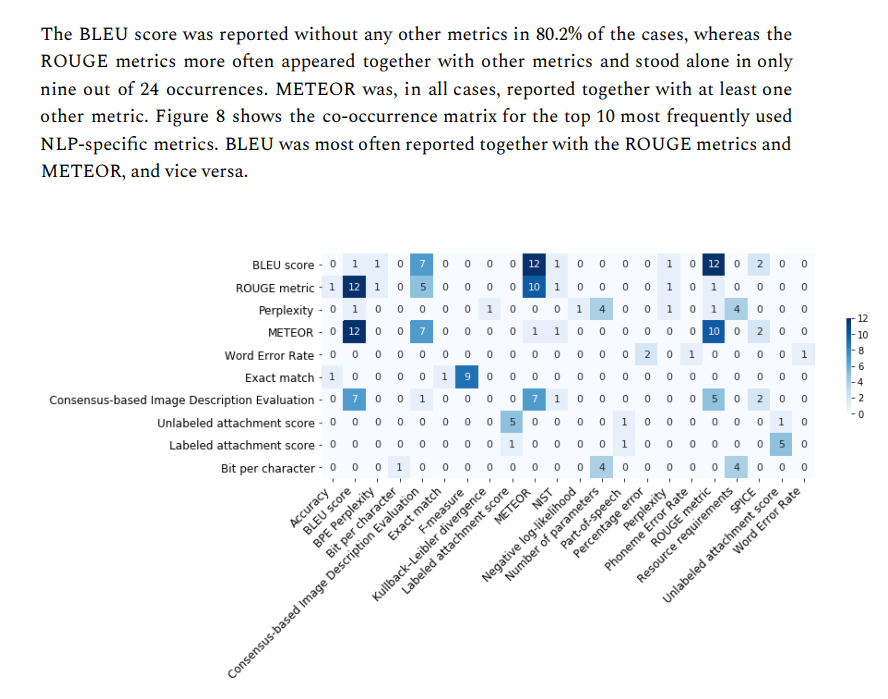

Furthermore, there have been industrial examples on the use of ROUGE metric in the assessment of translation accuracy - notably Grammarly. While Grammarly has not disclosed the full extent of their evaluation analysis, Grammarly deploys direct metrics to help evaluate the model's precision (80%) as well as the model's recall, even at one instance stating that during the development of their product, [their recall metric has raised from 40% to 62%](https://www.grammarly.com/blog/engineering/nlp-ml-identify-main-points/). All of these examples do signify that there are real-life applications and uses to introducing ROUGE into our evaluation metrics, and that it does not complicate our analysis and evaluation in anyway.

### **Limitations of ROUGE over BLEU evaluation metrics**

That being said, there are notable limitations within ROUGE that must be acknowledged over BLEU when evaluating translation accuracy and syntax overlap. In the case of the BLEU evaluation metric, introducing more datasets and references when determining translation syntax does raise the reliability of the BLEU metric, as shown evidently with `example_bleu_only_limitations()` with three references having a higher score 73.11 as opposed to `example_rouge_only_limitations()` with three references at 72.72. This implies that the limitations encountered for BLEU can be addressed by introducing more datasets and references for the model to draw from, which allows for a more reliable score and evaluation overall. That being said, introducing more datasets and references for the model may not necessarily be available for all use cases, especially if the datasets are limited and not varied.

In [ ]:
def example_bleu_only_limitations():
    refs = [["The cat was found under the bed."],
            ["The cat moved itself under the bed and was found there."],
            ["Under the bed, the cat moved there and was found."]]
    
    hyps = ["The cat moved and was found under the bed."]

    bleu = sacrebleu.metrics.BLEU()

    result = bleu.corpus_score(hyps, refs)
    print(result)

In [ ]:
example_bleu_only_limitations()

BLEU = 73.11 100.0/88.9/75.0/42.9 (BP = 1.000 ratio = 1.250 hyp_len = 10 ref_len = 8)


In [ ]:
def example_rouge_only_limitations():
    # Pre-process and tokenize the summaries as you like
    hypotheses = [
        ["The cat moved and was found under the bed.".split()]
    ]
    references = [[
        ["The cat was found under the bed.".split()],
        ["The cat moved itself under the bed and was found there.".split()],
        ["Under the bed, the cat moved there and was found.".split()]
    ]]

    # Evaluate on tokenized documents
    rouge = PyRouge(rouge_n=(1, 2, 4), rouge_l=True, rouge_w=False,
                    rouge_w_weight=1.2, rouge_s=False, rouge_su=False, skip_gap=4)
    scores = rouge.evaluate_tokenized(hypotheses, references)
    pprint(scores)

In [ ]:
example_rouge_only_limitations()

{'rouge-1': {'f': 0.7272727272727273,
             'p': 0.7407407407407407,
             'r': 0.7142857142857143},
 'rouge-2': {'f': 0.4897959183673469, 'p': 0.5, 'r': 0.48},
 'rouge-4': {'f': 0.10810810810810811,
             'p': 0.1111111111111111,
             'r': 0.10526315789473684},
 'rouge-l': {'f': 0.6181818181818182,
             'p': 0.6296296296296297,
             'r': 0.6071428571428571}}
